# Project: Providing data-driven suggestions for HR

## Description and Deliverables

This project focuses on analyzing an employee dataset and building predictive mdoels to support the Human Resources (HR) department of large consulting firm.

<font size=5>Objective</font>

The goal is to predict whether an employee will leave the company using available features such as job satisfaction, performance evaluations, workload, tenure, and compensation. By identifying factors that influence attrition, HR can develop strategies to imporve employee retention and reduce the costs of turnover.

<font size=5>Approach</font>

A predictive modeling approach was applied using either:

- **Statistical methods** such as logistic regression or,
- **Machine learning models** such as decision tree, random forest or XGBoost.

<font size=5>Deliverables</font>

1. Executive Summary
    - A concise summary highlighting methodology, findings, and business recommendations for stakeholders
2. Code Notebook
   - Complete analysis workflow including data preparation, exploratory data analysis, model building, and evaluation.
  
<font size=5>Inclusions</font>
- Model evaluation with interpretation of results.
- Data visualization that address the key question of predicting employee attrition.
- Ethical considerations relevant to predictive modelingin HR.
- Resource log documenting references used to troubleshooting and solutions.

## Dataset descriptions


| Variable               | Description                                                  |
|-------------------------|--------------------------------------------------------------|
| satisfaction_level      | Employee-reported job satisfaction level [0–1]              |
| last_evaluation         | Score of employee's last performance review [0–1]           |
| number_project          | Number of projects employee contributes to                  |
| average_monthly_hours   | Average number of hours employee worked per month           |
| time_spend_company      | How long the employee has been with the company (years)     |
| work_accident           | Whether or not the employee experienced a work accident     |
| left                    | Whether or not the employee left the company (target)       |
| promotion_last_5years   | Whether the employee was promoted in the last 5 years       |


# Importing dataset

In [9]:
# data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Import data
df = pd.read_csv('../data/HR_capstone_dataset.csv')

# Data Exploration (Initial EDA and data Cleaning)

In [11]:
# Gather basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
# Gather descriptive statistics from data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<font size=4>Rename columns</font>

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [13]:
# rename the columns
rename_map = {
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'left': 'churn_status',
    'number_project': 'number_projects',
    'time_spend_company': 'tenure',
    'Department': 'department'
}

df.rename(columns=rename_map, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_projects        14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   churn_status           14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<font size=4>Check missing values</font>

check for any missing values in the data.


In [14]:
# check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
churn_status             0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

<font size=4>Check duplicates</font>

check for any duplicate entries in the data.

In [15]:
# check for dupes
df.duplicated().sum()

np.int64(3008)

In [16]:
# inspect rows containing duplicates
df[df.duplicated(keep=False)].head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,churn_status,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [17]:
# Drop duplicates
df_subset = df.drop_duplicates()

df_subset.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,churn_status,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


<font size=4>Check outliers</font>

check for outliers in the data.

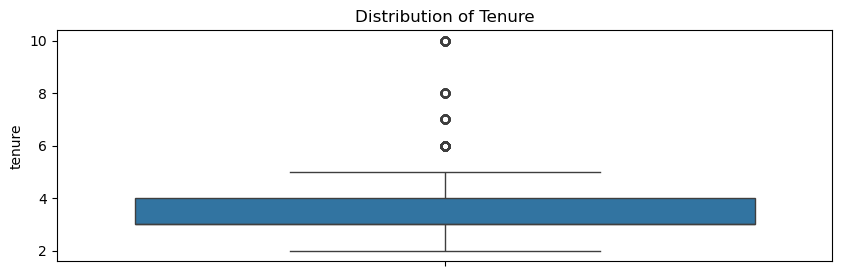

In [18]:
# Distribution of Tenure in order to check outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
sns.boxplot(data=df_subset['tenure'])
plt.title('Distribution of Tenure')
plt.show()

In [19]:
# The number of rows containing outliers in 'tenure'
Q1 = df_subset['tenure'].quantile(0.25)
Q3 = df_subset['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Outlier mask
outlier_mask = (df_subset['tenure'] < (Q1 - 1.5 * IQR)) | (df_subset['tenure'] > (Q3 + 1.5 * IQR))

# Count outlier rows
num_outlier_rows = outlier_mask.sum()
print(f"Number of rows containing outliers: {num_outlier_rows}")

Number of rows containing outliers: 824


Some models are sensitive to outliers than others. When we get to the stage of building the models, we'll consider whether to remove outliers, based on the type of model we decide to use.

# Data Exploration

Understanding how many employees left and what percentage of all employees this figure represents

In [20]:
# Get number of people who left vs. stayed
display(df_subset['churn_status'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(f"People who left: {df_subset['churn_status'].value_counts()[0] / df_subset.shape[0] * 100:.2f}%")
print(f"People who stayed: {df_subset['churn_status'].value_counts()[1]/ df_subset.shape[0] * 100:.2f}%")

churn_status
0    10000
1     1991
Name: count, dtype: int64


People who left: 83.40%
People who stayed: 16.60%


<font size=5>Data visualizations</font>

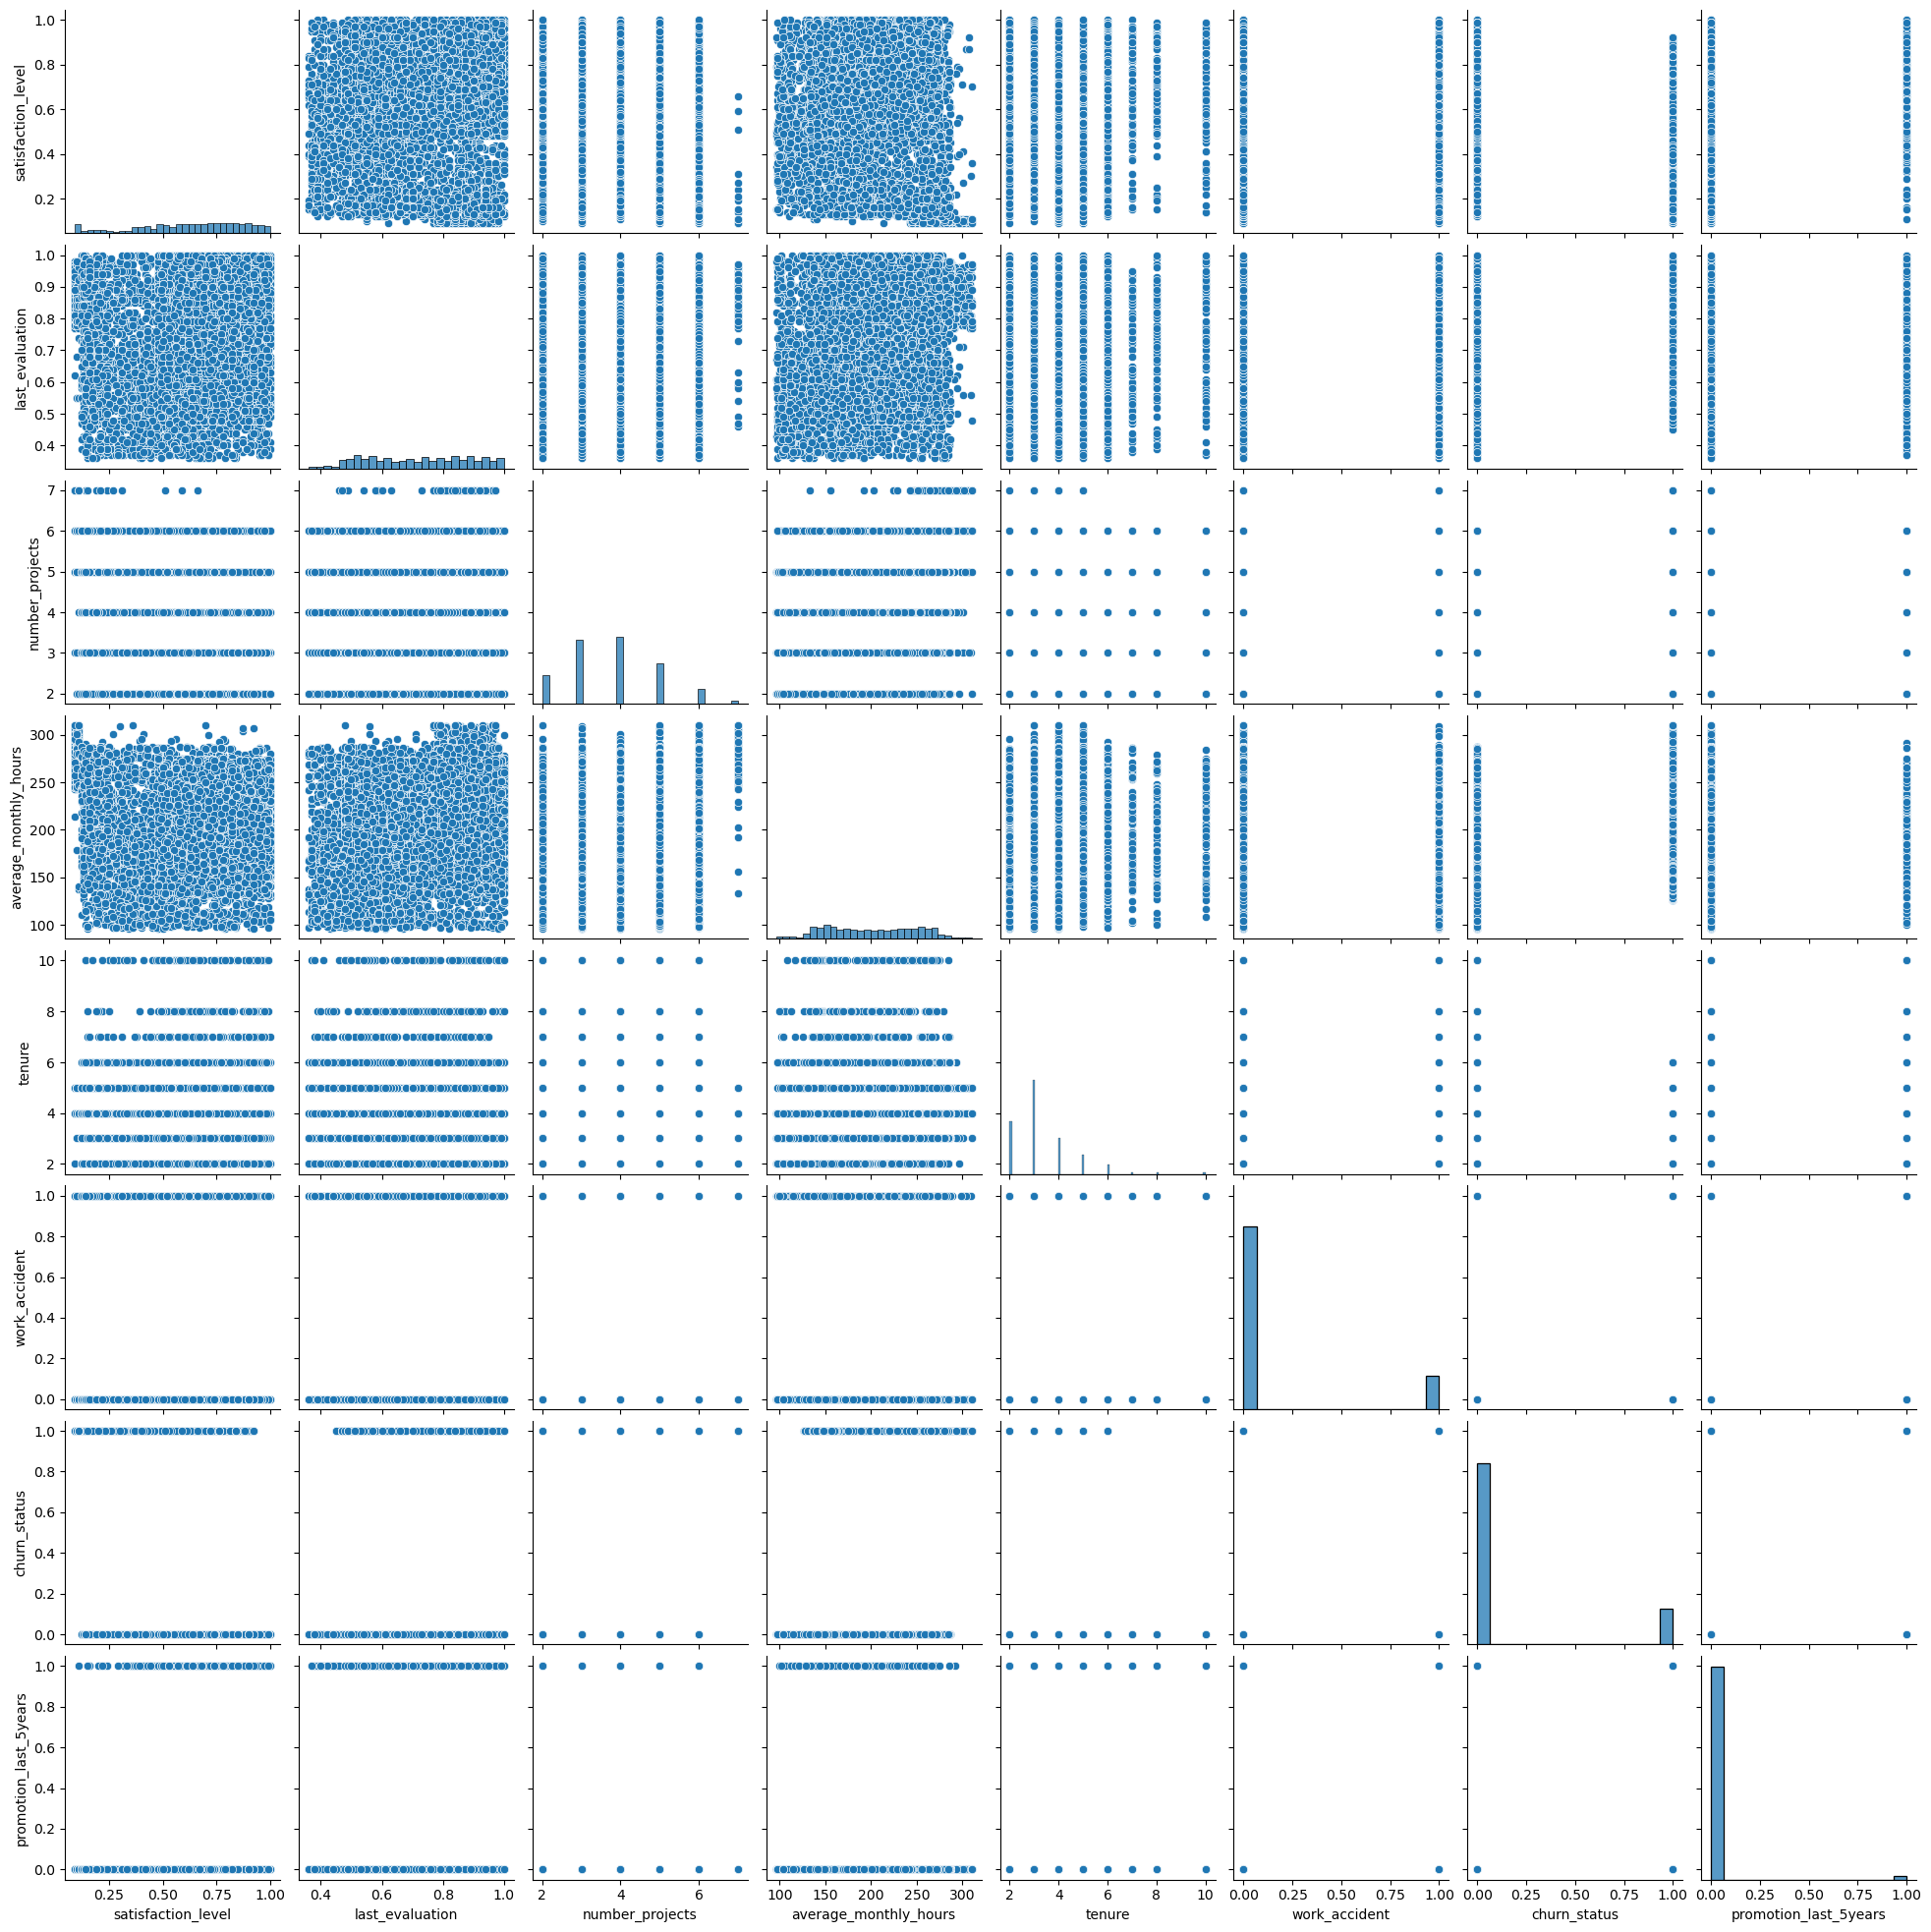

In [21]:
num_cols = df_subset.select_dtypes(include=['number']).columns
sns.pairplot(df_subset[num_cols])

## Satisfaction vs. Churn

* Null Hypothesis

There's no significant difference in the average satisfaction level between employees who stayed and those who left.

* Alternate Hypothesis

There is a significant difference in the average satisfaction level between employees who stayed and those who left.

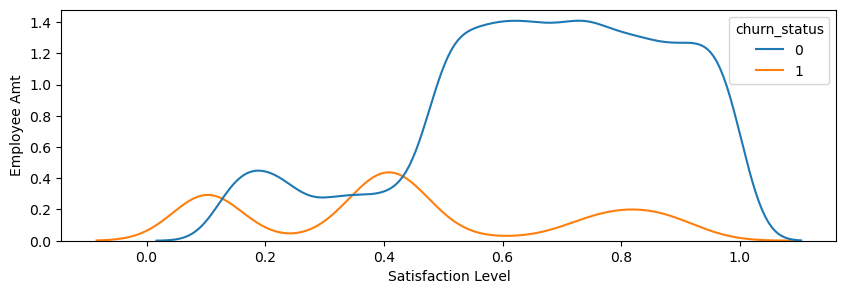

In [22]:
plt.figure(figsize=(10, 3))
sns.kdeplot(data=df_subset, x='satisfaction_level', hue='churn_status')
plt.ylabel('Employee Amt')
plt.xlabel('Satisfaction Level')
plt.show()

We observe that employees who churned show two main peaks in satisfaction: one around 0.1
and other near 0.4. In contrast, employees who stayed have small peak near 0.2, but their density rises steadily at 0.6 and above, indicating that higher satisfaction strongly correlates with retention. At the 0.4 satisfaction level, churn is more common that staying, whereas at around 0.2, staying employees slightly outnumber those who left.

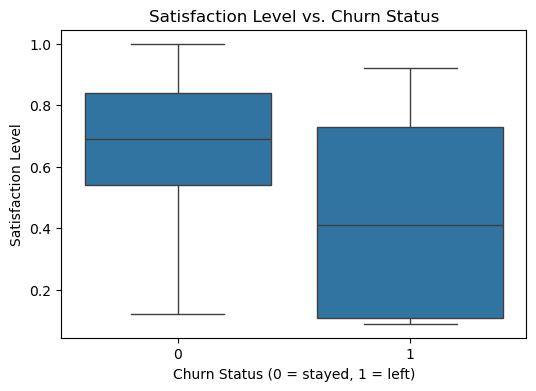

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x="churn_status", y="satisfaction_level", data=df_subset)
plt.title("Satisfaction Level vs. Churn Status")
plt.xlabel("Churn Status (0 = stayed, 1 = left)")
plt.ylabel("Satisfaction Level")
plt.show()

So, as we can see employees with higher satisfaction amounts stayed without churning. Satisfaction levels can be a good independant variable predicting churn status.

## Employee Performance

* Null Hypothesis

There is no significant difference in performance evaluation scores between employees who stayed and those who left.

* Alternate Hypothesis

Employees with very high or very low performance evaluation scores are more likely to leave compared to those with average scores.

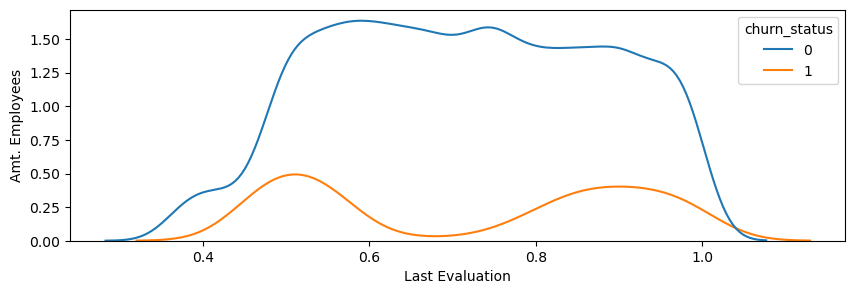

In [24]:
plt.figure(figsize=(10, 3))
sns.kdeplot(data=df_subset, x='last_evaluation', hue='churn_status')
plt.xlabel('Last Evaluation')
plt.ylabel('Amt. Employees')
plt.show()

The plot shows two distinct peaks in evaluation scores among employees who left: one around 0.5, reflecting mid-to-lower performance, and another near 0.9, representing high performers. This suggests that both underperformers and top performers are more likely to leave the company. In contrast, employees who stayed display a more even distribution of evaluation across the full range, without sharp peaks or drops.

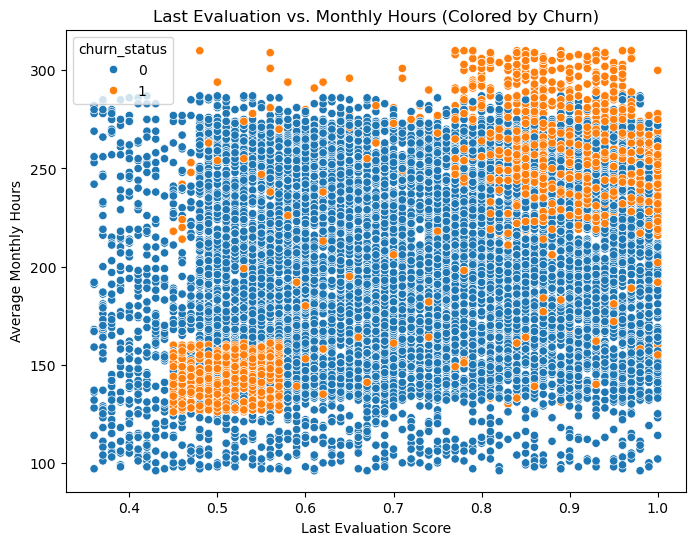

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="last_evaluation",
    y="average_monthly_hours",
    hue="churn_status",
    data=df,
)

plt.title("Last Evaluation vs. Monthly Hours (Colored by Churn)")
plt.xlabel("Last Evaluation Score")
plt.ylabel("Average Monthly Hours")
plt.show()

The scatter plot reveals a clear burnout cluster in the top-right corner: employees with very high evaluation scores (0.8-1.0) and long workout hours are more likely to churn. This supports the alternate hypothesis that not only low performers leave, but also high-performing employees who are overworked.

In contrast, employees with moderate evaluations and moderate hours are less likely to leave, indicating stability.

## Number of Projects

* Null Hypothesis

There is no significant difference in churn rates based on the number of projects assigned.

* Alternate Hypothesis

Employees with very few or very many projects are more likely to churn compared to those with a moderate project load.

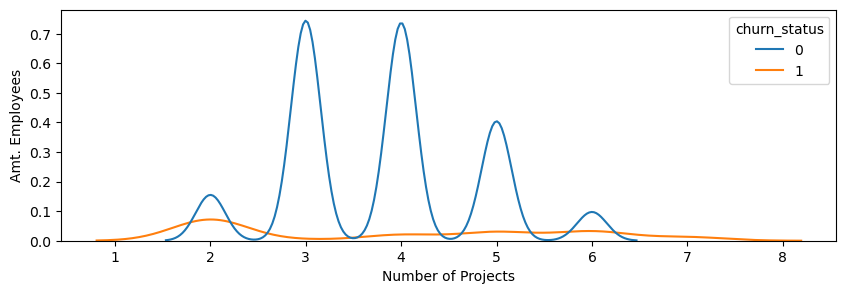

In [26]:
plt.figure(figsize=(10,3))
sns.kdeplot(data=df_subset, x='number_projects', hue='churn_status')
plt.xlabel('Number of Projects')
plt.ylabel('Amt. Employees')
plt.show()

The distribution of project across churned employees appears relatively uniform, with no extreme peaks. There is a slight rise in churn as the number of projects increases, with a small bump at 2 projects. In contrast, employees who stayed show clear peaks at 3, 4, and 5 projects, suggesting that this range is the optimal workload for retention. At the extreme, employees with 8 projects all churned, as none remained with the company under that workload.

## Tenure

* Null Hypothesis

There is no significant relationship between employee tenure and liklihood of churn.

* Alternate Hypothesis

Employees with certain tenure levels are more likely to churn compared to other groups.

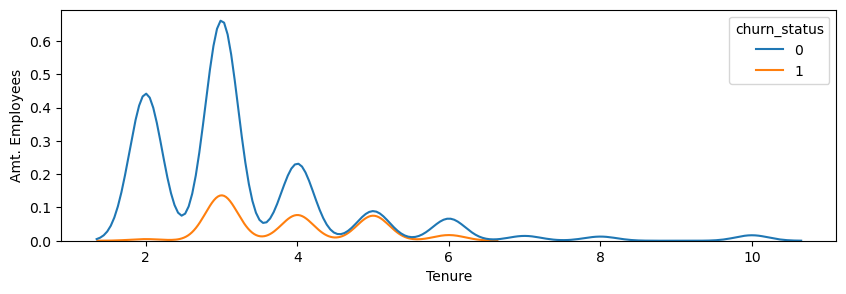

In [27]:
plt.figure(figsize=(10, 3))
sns.kdeplot(data=df_subset, x='tenure', hue='churn_status')
plt.xlabel('Tenure')
plt.ylabel('Amt. Employees')
plt.show()

Employees with 3 to 5 years of tenure show a significant amount of churn, while those have been with company for 7 or more years display almost no churn. This suggests that long-tenured employees are much less likely to leave. In the early career stages (1-4 years), there are also peaks in retention; however, since the number of employees who stayed is greater than those who left, it is difficult to conclude that early tenure guarantees higher retention compared to churn.

## Promotions, Salary, Work accidents causing churn ?

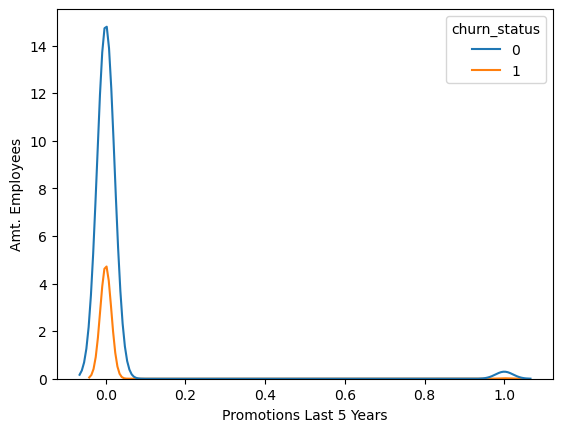

In [28]:
sns.kdeplot(data=df_subset, x='promotion_last_5years', hue='churn_status')
plt.xlabel('Promotions Last 5 Years')
plt.ylabel('Amt. Employees')
plt.show()

The plot suggests that employees who did not recieve a promotion in the last 5 years show a greater tendency to churn which is plausible outcome. However, due to the strong class imbalance in the dataset, we cannot directly conclude that employees who stayed without promotions are necessariliy less at risk, since the majoriy of the employees overall have lower churns.

In [29]:
pd.crosstab(df_subset['salary'], df_subset['churn_status'], normalize='index')

churn_status,0,1
salary,,
high,0.951515,0.048485
low,0.795470,0.204530
medium,0.853830,0.146170


In [30]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_subset['salary'], df_subset['churn_status'])
chi2, p, dof, ex = chi2_contingency(contingency)

print("Chi-square:", chi2, "p-value:", round(p, 4))

Chi-square: 175.21071935727466 p-value: 0.0


In [31]:
pd.crosstab(df_subset['work_accident'], df_subset['churn_status'], normalize='index')

churn_status,0,1
work_accident,,
0,0.814022,0.185978
1,0.943243,0.056757


In [32]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_subset['work_accident'], df_subset['churn_status'])
chi2, p, dof, ex = chi2_contingency(contingency)

print("Chi-square:", chi2, "p-value:", round(p, 4))

Chi-square: 187.7378344525747 p-value: 0.0


In [33]:
pd.crosstab(df_subset['department'], df_subset['churn_status'], normalize='index')

churn_status,0,1
department,,
IT,0.838115,0.161885
RandD,0.877522,0.122478
accounting,0.824477,0.175523
hr,0.811980,0.188020
management,0.880734,0.119266
marketing,0.833581,0.166419
product_mng,0.839650,0.160350
sales,0.830195,0.169805
support,0.828666,0.171334


In [34]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_subset['department'], df_subset['churn_status'])
chi2, p, dof, ex = chi2_contingency(contingency)

print("Chi-square:", chi2, "p-value:", round(p, 4))

Chi-square: 20.857513153795892 p-value: 0.0133


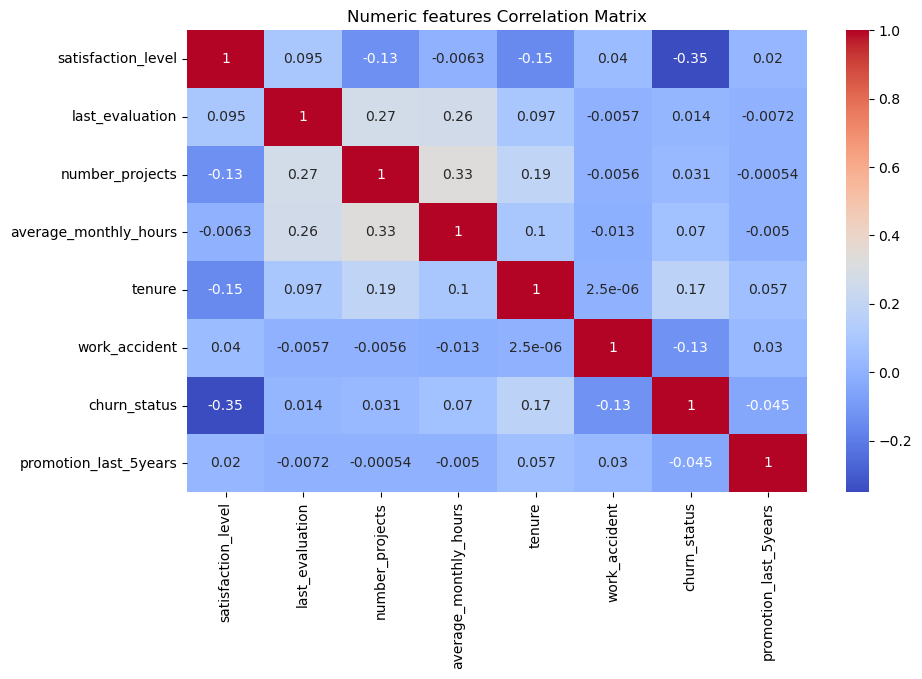

In [35]:
corr = df_subset[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric features Correlation Matrix")
plt.show()

# Construction Stage

## Model building

* Fit a model that predicts the outcome variable using two or more independent variables
* Check model assumptions
* Evaluate the model

<font size=4>Type of Prediction Task</font>

The goal is to predict whether an employee will stay or leave the company based on features such as satisfaction level, evaluation score, workload, tenure, and salary. Since the target variable (`churn_status`) has two categories (0 = stayed, 1 = left), this is a **binary classification task**.

<font size=4>Most Appropirate models for this task</font>

- Logistic Regression → interpretable, provides probabilities of churn, useful for understanding feature importance.
- Decision Trees → easy to visualize, capture non-linear relationships.
- Random Forest → ensemble of decision trees, reduces overfitting, improves accuracy.
- XGBoost → gradient boosting model, highly effective for structured/tabular data, often archieves strong predictive performance.

In [36]:
# Split the categorical variable
y = df_subset['churn_status']
# Split the independant variables
X = df_subset.drop('churn_status', axis=1)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_projects        11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 936.8+ KB


In [38]:
# Encode independent variables
X_encoded = pd.get_dummies(data=X, columns=['department', 'salary'], dtype=int)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_projects         11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   department_IT           11991 non-null  int64  
 8   department_RandD        11991 non-null  int64  
 9   department_accounting   11991 non-null  int64  
 10  department_hr           11991 non-null  int64  
 11  department_management   11991 non-null  int64  
 12  department_marketing    11991 non-null  int64  
 13  department_product_mng  11991 non-null  int64  
 14  department_sales        11991 non-null  int

In [39]:
# Encode dependent variable (y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_encoded = le.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, stratify=y, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (8393, 20)
Shape X_test: (3598, 20)
Shape y_train: (8393,)
Shape y_test: (3598,)


In [41]:
# Split data for validation
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
print(f"Shape X_tr: {X_tr.shape}")
print(f"Shape X_val: {X_val.shape}")
print(f"Shape y_tr: {y_tr.shape}")
print(f"Shape y_val: {y_val.shape}")

Shape X_tr: (6714, 20)
Shape X_val: (1679, 20)
Shape y_tr: (6714,)
Shape y_val: (1679,)


## Modeling: Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf_lr = LogisticRegression()

fitted_model = clf_lr.fit(X_tr, y_tr)

In [129]:
y_val_preds = fitted_model.predict(X_val)

preds_compared = pd.DataFrame(
    {
        'predicted': y_val_preds,
        'real': y_val
    }
)

preds_compared.head()

,predicted,real
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [130]:
from sklearn.metrics import classification_report

clf_lr_report = classification_report(y_val, y_val_preds)
print(clf_lr_report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1400
           1       0.45      0.19      0.27       279

    accuracy                           0.83      1679
   macro avg       0.65      0.57      0.59      1679
weighted avg       0.79      0.83      0.80      1679



In [4]:
path = '../models/'

import pickle
with open(path + "clf_lr.pkl", 'wb') as f:
    pickle.dump(gscv_lr.best_estimator_, f)

with open(path + "clf_lr.pkl", 'rb') as f:
    clf_lr_loaded = pickle.load(f)

EOFError: Ran out of input

In [157]:
from sklearn.metrics import roc_auc_score

y_val_preds = clf_lr_loaded.predict(X_val)
roc_auc_lr = roc_auc_score(y_val, y_val_preds)

print(f"ROC AUC score LR: {roc_auc_lr}")

ROC AUC score LR: 0.5563402457757297


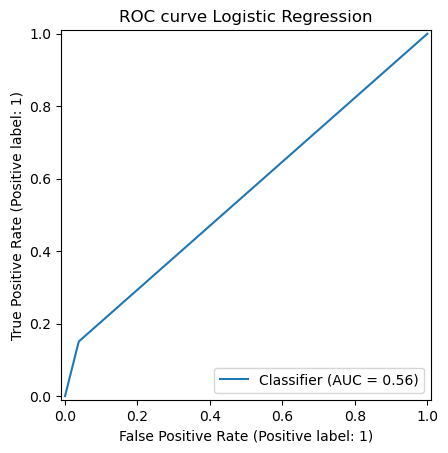

In [158]:
RocCurveDisplay.from_predictions(y_val, y_val_preds)
plt.title('ROC curve Logistic Regression')
plt.show()

## Modeling: XGBoost

In [134]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

param_grid = {
    "n_estimators": [100, 200, 500],          # number of boosting rounds (trees)
    "max_depth": [3, 5, 7],                   # tree depth (complexity control)
    "learning_rate": [0.01, 0.1, 0.2],        # step size shrinkage
    "subsample": [0.7, 0.8, 1.0],             # % of rows sampled per tree
    "colsample_bytree": [0.7, 0.8, 1.0],      # % of features sampled per tree
    "gamma": [0, 1, 5],                       # min loss reduction (regularization)
    "min_child_weight": [1, 3, 5],            # min sum of instance weight in a child
    "scale_pos_weight": [1, 3, 5]             # handle class imbalance (important for churn!)
}

scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}

gscv_xgb = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

fitted_model = gscv_xgb.fit(X_tr, y_tr)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


In [135]:
from sklearn.metrics import classification_report

y_val_preds = fitted_model.best_estimator_.predict(X_val)
clf_xgb_report = classification_report(y_val, y_val_preds)
print(clf_xgb_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1400
           1       0.96      0.93      0.94       279

    accuracy                           0.98      1679
   macro avg       0.97      0.96      0.97      1679
weighted avg       0.98      0.98      0.98      1679



In [ ]:
with open(path + "clf_xgb.pkl", 'wb') as f:
    pickle.dump(gscv_xgb.best_estimator_, f)

In [6]:
with open(path + "clf_xgb.pkl", 'rb') as f:
    clf_xgb_loaded = pickle.load(f)

In [159]:
from sklearn.metrics import roc_auc_score

y_val_preds = clf_xgb_loaded.predict(X_val)
roc_auc_xgb = roc_auc_score(y_val, y_val_preds)

print(f"ROC AUC score XGB: {roc_auc_xgb}")

ROC AUC score XGB: 0.9602291346646186


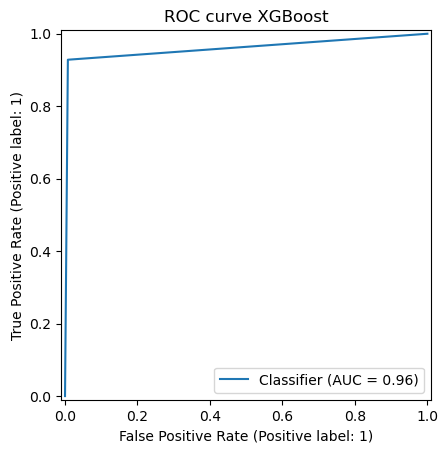

In [160]:
RocCurveDisplay.from_predictions(y_val, y_val_preds)
plt.title('ROC curve XGBoost')
plt.show()

## Modeling: Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],          # keep only 2 options (fast vs moderate)
    "max_depth": [5, 10, None],          # shallow, medium, unrestricted
    "min_samples_split": [2, 5],         # standard values
    "min_samples_leaf": [1, 2],          # small values only
    "max_features": ["sqrt", "log2"],    # standard best practices
    "class_weight": [None, "balanced"]   # test handling imbalance
}


scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'
}

gscv_rf = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

fitted_model = gscv_rf.fit(X_tr, y_tr)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [139]:
from sklearn.metrics import classification_report

y_val_preds = fitted_model.best_estimator_.predict(X_val)
clf_rf_report = classification_report(y_val, y_val_preds)
print(clf_rf_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1400
           1       0.96      0.90      0.93       279

    accuracy                           0.98      1679
   macro avg       0.97      0.95      0.96      1679
weighted avg       0.98      0.98      0.98      1679



In [151]:
with open(path + "clf_rf.pkl", 'wb') as f:
    pickle.dump(gscv_rf.best_estimator_, f)

with open(path + 'clf_rf.pkl', 'rb') as f:
    clf_rf_loaded = pickle.load(f)

In [155]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_val_preds = clf_rf_loaded.predict(X_val)
roc_auc_rf = roc_auc_score(y_val, y_val_preds)

print(f"ROC AUC score XGB: {roc_auc_rf}")

ROC AUC score XGB: 0.9480414746543779


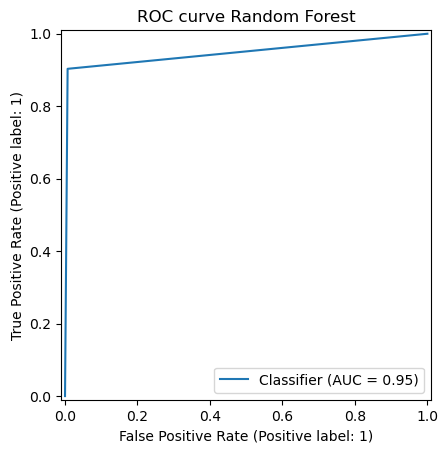

In [156]:
RocCurveDisplay.from_predictions(y_val, y_val_preds)
plt.title('ROC curve Random Forest')
plt.show()

In [45]:
importances = clf_xgb_loaded.feature_importances_
feat_names = X_val.columns

feature_imp = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
})

feature_imp = feature_imp.sort_values(by='Importance', ascending=False)
feature_imp.head(20)

,Feature,Importance
4,tenure,0.332261
0,satisfaction_level,0.258367
2,number_projects,0.080079
1,last_evaluation,0.076149
3,average_monthly_hours,0.047354
5,work_accident,0.029355
17,salary_high,0.021941
18,salary_low,0.021815
11,department_management,0.020937
16,department_technical,0.019104
